In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
from scipy.cluster.hierarchy import dendrogram, linkage

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
df_train = pd.read_csv('./Datasets/clean_train_data.csv')
df_test = pd.read_csv('./Datasets/clean_test_data.csv')

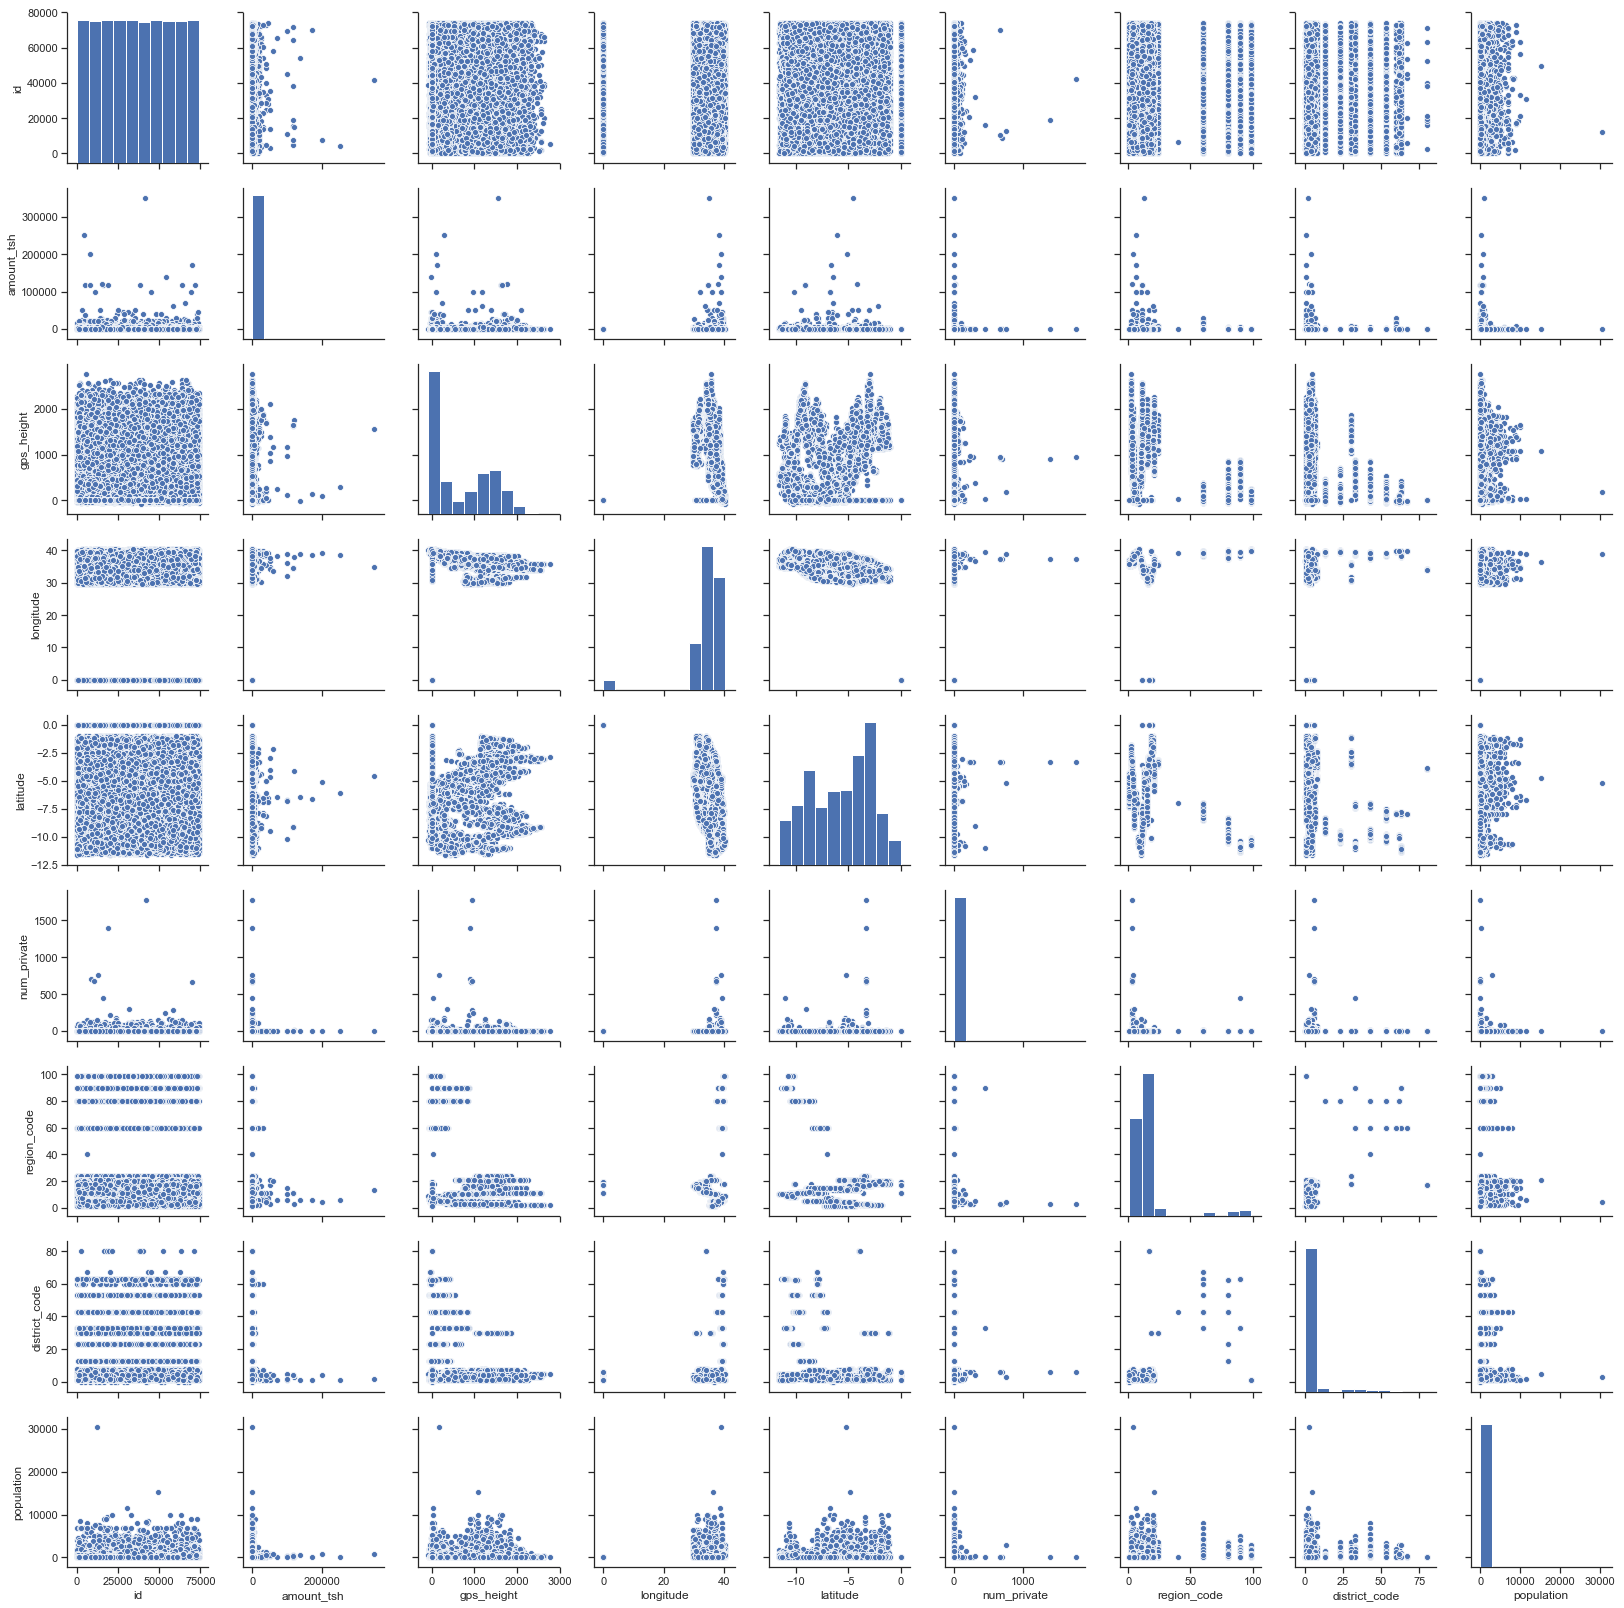

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_train)

[Text(0, 0.5, 'Population'),
 Text(0.5, 0, 'Latitude'),
 Text(0.5, 1.0, 'Distribution of Population Based on Latitude')]

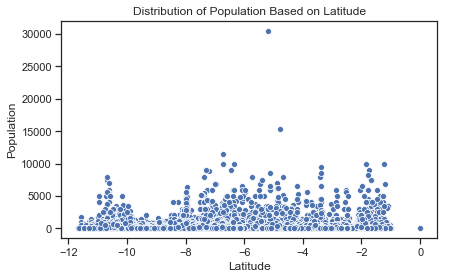

In [9]:
# Scatter Plot of Population compared to Latitude.

sns.set(style="ticks", color_codes=True)
ax = sns.scatterplot(df_train['latitude'], df_train['population'])
ax.set(ylabel='Population', 
       xlabel='Latitude', 
       title='Distribution of Population Based on Latitude')

[Text(0, 0.5, 'Population'),
 Text(0.5, 0, 'Feet Above Sea Level'),
 Text(0.5, 1.0, 'Distribution of Population Based on Height Above Sea Level')]

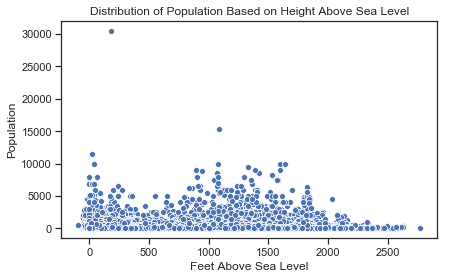

In [11]:
# Scatter Plot of Population compared to Height above sea level.  
sns.set(style="ticks", color_codes=True)
ax = sns.scatterplot(df_train['gps_height'], df_train['population'])
ax.set(ylabel='Population', 
       xlabel='Feet Above Sea Level', 
       title='Distribution of Population Based on Height Above Sea Level')

In [8]:
# Print the value counts for categorical columns
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df_train[col].value_counts())


Column Name: date_recorded
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
2011-03-11    426
2013-01-30    421
2013-02-16    418
2011-03-23    417
2011-03-09    416
2013-01-18    409
2013-02-26    391
2011-03-30    391
2011-03-24    381
2013-03-19    381
2013-02-13    380
2011-03-12    379
2013-01-23    379
2011-03-03    378
2013-01-28    376
             ... 
2004-01-07      1
2002-10-14      1
2004-03-06      1
2011-09-06      1
2011-08-30      1
2011-09-16      1
2013-12-01      1
2012-01-21      1
2011-09-15      1
2011-09-26      1
2011-09-13      1
2011-09-23      1
2011-09-27      1
2011-09-18      1
2011-09-20      1
2013-01-06      1
2011-09-11      1
2011-09-01      1
2011-09-08      1
2011-09-28      1
2013-01-01      1
2011-09-12      1
2004-06-01      1


never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

Column Name: quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Column Name: quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

Column Name: source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

Column Name: source_class
groundwater    45794
surface        13328
unknow

In [9]:
df_train.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [10]:
# Create a new column to explore what variables in columns have more 
# functional or more broken and non functional pumps.

replace_values = {'functional':2, 'functional needs repair':1,
                   'non functional':0}

df_train['status_values']  = df_train.status_group.replace(replace_values)

In [11]:
df_train['status_values'].head()

0    2
1    2
2    2
3    0
4    2
Name: status_values, dtype: int64

In [31]:
# See what basin area has the most functional and least functional pumps
piv_bas = pd.pivot_table(df_train, index=['basin', 'status_group'],
                           values=['status_values'], aggfunc='count')
piv_bas

status_values
basin                   status_group                          
Internal                functional                        4482
                        functional needs repair            557
                        non functional                    2746
Lake Nyasa              functional                        3324
                        functional needs repair            250
                        non functional                    1511
Lake Rukwa              functional                        1000
                        functional needs repair            270
                        non functional                    1184
Lake Tanganyika         functional                        3107
                        functional needs repair            742
                        non functional                    2583
Lake Victoria           functional                        5100
                        functional needs repair            989
                        non functional                    4159
Pangani                 functional                        5372
                        functional needs repair            477
                        non functional                    3091
Rufiji                  functional                        5068
                        functional needs repair            437
                        non functional                    2471
Ruvuma / Southern Coast functional                        1670
                        functional needs repair            326
                        non functional                    2497
Wami / Ruvu             functional                        3136
                        functional needs repair            269
                        non functional                    2582

[Text(0, 0.5, 'Total #'),
 Text(0.5, 0, 'Basin'),
 Text(0.5, 1.0, 'Status and Basin Type')]

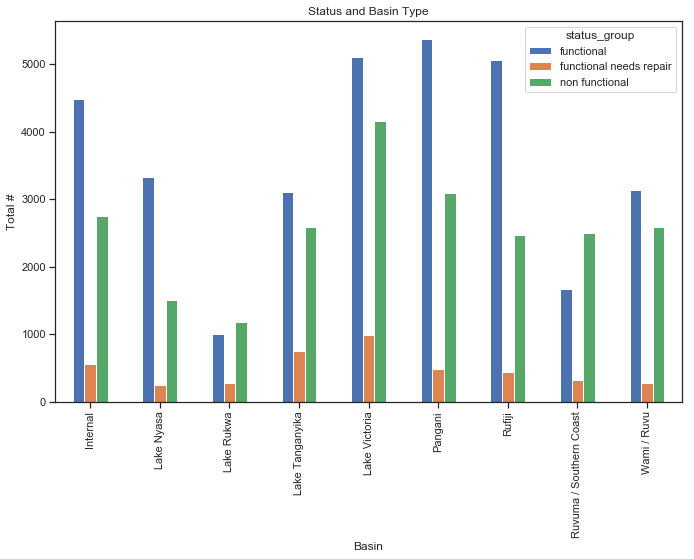

In [47]:
# Examine the functionality of pumps in different basins.
df_train.groupby('basin')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(figsize=(10,7))\
    .set(ylabel='Total #', 
       xlabel='Basin', 
       title='Status and Basin Type')\

In [29]:
# See what payment types have the most functional and least functional pumps
piv_pay = pd.pivot_table(df_train, index= ['payment', 'status_group'],
                           values=['status_values'], aggfunc='count')
piv_pay

status_values
payment               status_group                          
never pay             functional                       11379
                      functional needs repair           1907
                      non functional                   12062
other                 functional                         611
                      functional needs repair            118
                      non functional                     325
pay annually          functional                        2740
                      functional needs repair            247
                      non functional                     655
pay monthly           functional                        5482
                      functional needs repair            927
                      non functional                    1891
pay per bucket        functional                        6090
                      functional needs repair            409
                      non functional                    2486
pay when scheme fails functional                        2429
                      functional needs repair            277
                      non functional                    1208
unknown               functional                        3528
                      functional needs repair            432
                      non functional                    4197

[Text(0, 0.5, 'Total #'),
 Text(0.5, 0, 'Payment'),
 Text(0.5, 1.0, 'Status and Payment Type')]

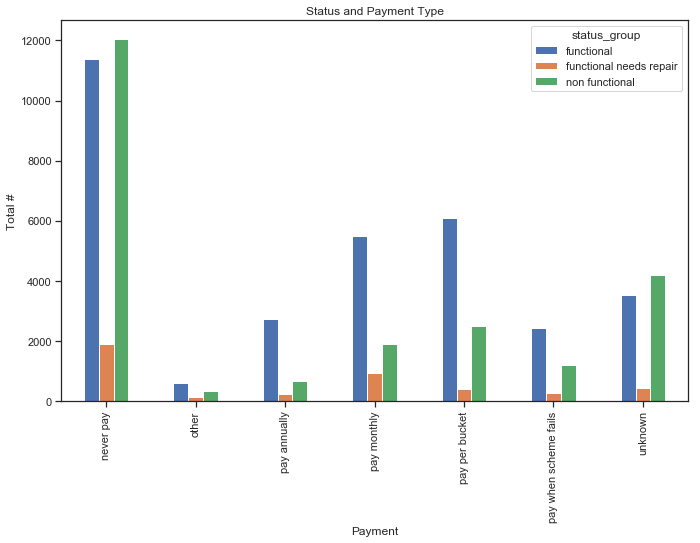

In [48]:
# Examine the functionality of pumps based on payment type.
df_train.groupby('payment')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(figsize=(10,7))\
    .set(ylabel='Total #', 
       xlabel='Payment', 
       title='Status and Payment Type')\

In [49]:
piv_con = pd.pivot_table(df_train, index= ['construction_year', 'status_group'],
                           values=['status_values'], aggfunc='count')
piv_con

status_values
construction_year status_group                          
1960s             functional                         156
                  functional needs repair             42
                  non functional                     340
1970s             functional                        1406
                  functional needs repair            348
                  non functional                    2652
1980s             functional                        2220
                  functional needs repair            423
                  non functional                    2935
1990s             functional                        4139
                  functional needs repair            518
                  non functional                    3021
2000s             functional                        9989
                  functional needs repair            977
                  non functional                    4364
2010s             functional                        3794
                  functional needs repair            220
                  non functional                    1147
unknown           functional                       10555
                  functional needs repair           1789
                  non functional                    8365

[Text(0, 0.5, 'Total #'),
 Text(0.5, 0, 'Decade of Construction'),
 Text(0.5, 1.0, 'Status and Decades')]

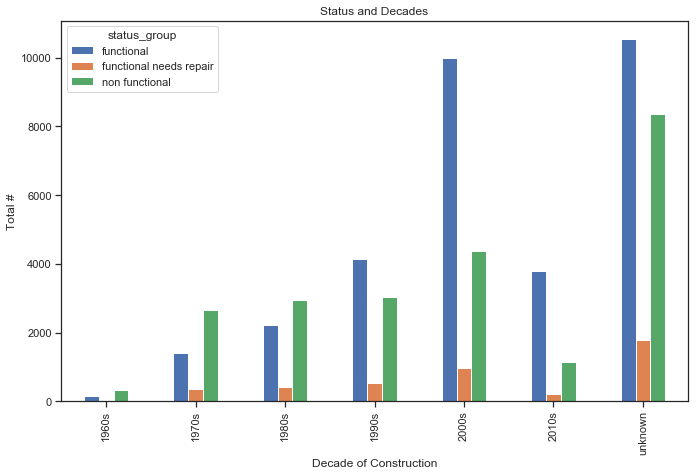

In [50]:
# 
df_train.groupby('construction_year')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(figsize=(10,7))\
    .set(ylabel='Total #', 
       xlabel='Decade of Construction', 
       title='Status and Decades')\

In [51]:
piv_typ = pd.pivot_table(df_train, index= ['waterpoint_type', 'status_group'],
                           values=['status_values'], aggfunc='count')
piv_typ

status_values
waterpoint_type             status_group                          
cattle trough               functional                          84
                            functional needs repair              2
                            non functional                      30
communal standpipe          functional                       17726
                            functional needs repair           2260
                            non functional                    8536
communal standpipe multiple functional                        2235
                            functional needs repair            648
                            non functional                    3220
dam                         functional                           6
                            non functional                       1
hand pump                   functional                       10805
                            functional needs repair           1029
                            non functional                    5654
improved spring             functional                         563
                            functional needs repair             85
                            non functional                     136
other                       functional                         840
                            functional needs repair            293
                            non functional                    5247

[Text(0, 0.5, 'Total #'),
 Text(0.5, 0, 'Waterpoint Type'),
 Text(0.5, 1.0, 'Status and Waterpoint Type')]

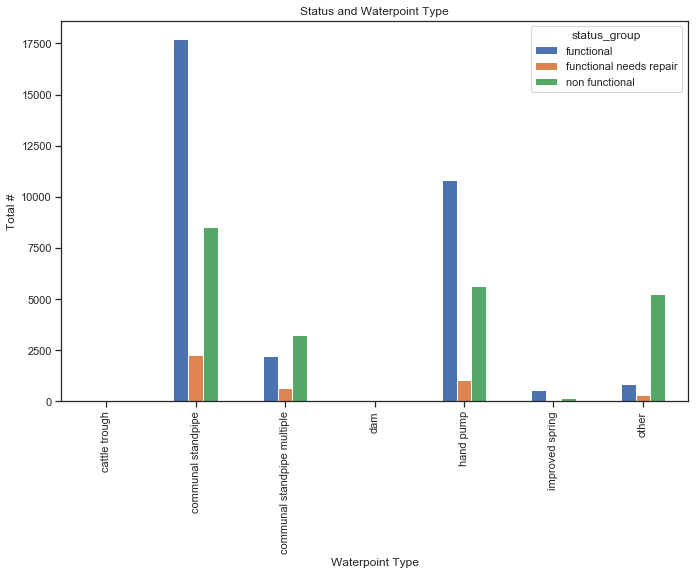

In [52]:
df_train.groupby('waterpoint_type')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(figsize=(10,7))\
    .set(ylabel='Total #', 
       xlabel='Waterpoint Type', 
       title='Status and Waterpoint Type')\

In [54]:
piv_sou = pd.pivot_table(df_train, index= ['source', 'status_group'],
                           values=['status_values'], aggfunc='count')
piv_sou

status_values
source               status_group                          
dam                  functional                         253
                     functional needs repair             24
                     non functional                     379
hand dtw             functional                         497
                     functional needs repair             17
                     non functional                     360
lake                 functional                         162
                     functional needs repair             12
                     non functional                     591
machine dbh          functional                        5422
                     functional needs repair            491
                     non functional                    5162
other                functional                         126
                     functional needs repair              1
                     non functional                      85
rainwater harvesting functional                        1386
                     functional needs repair            314
                     non functional                     595
river                functional                        5465
                     functional needs repair           1221
                     non functional                    2926
shallow well         functional                        8324
                     functional needs repair            957
                     non functional                    7543
spring               functional                       10592
                     functional needs repair           1276
                     non functional                    5153
unknown              functional                          32
                     functional needs repair              4
                     non functional                      30

[Text(0, 0.5, 'Total #'),
 Text(0.5, 0, 'Source'),
 Text(0.5, 1.0, 'Status and Source Type')]

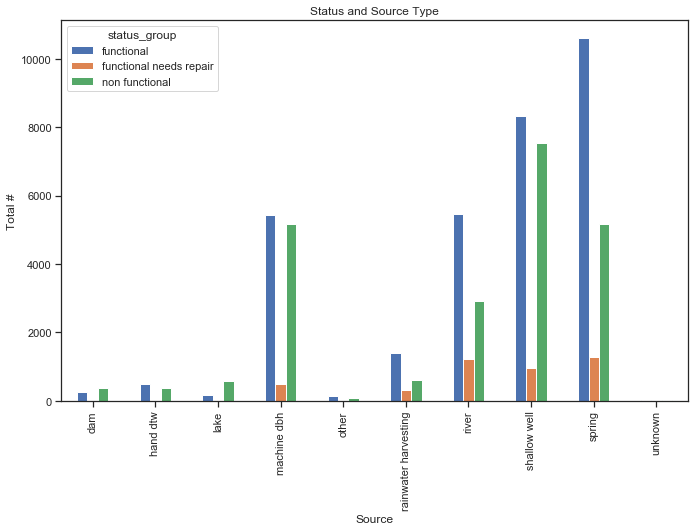

In [55]:
df_train.groupby('source')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(figsize=(10,7))\
    .set(ylabel='Total #', 
       xlabel='Source', 
       title='Status and Source Type')\

In [56]:
piv_ext = pd.pivot_table(df_train, index= ['extraction_type_class', 'status_group'],
                           values=['status_values'], aggfunc='count')
piv_ext

status_values
extraction_type_class status_group                          
gravity               functional                       16048
                      functional needs repair           2701
                      non functional                    8031
handpump              functional                       10375
                      functional needs repair            995
                      non functional                    5086
motorpump             functional                        1135
                      functional needs repair            138
                      non functional                    1714
other                 functional                        1029
                      functional needs repair            206
                      non functional                    5195
rope pump             functional                         293
                      functional needs repair             17
                      non functional                     141
submersible           functional                        3329
                      functional needs repair            253
                      non functional                    2597
wind-powered          functional                          50
                      functional needs repair              7
                      non functional                      60

[Text(0, 0.5, 'Total #'),
 Text(0.5, 0, 'Extraction Type'),
 Text(0.5, 1.0, 'Status and Extraction Type')]

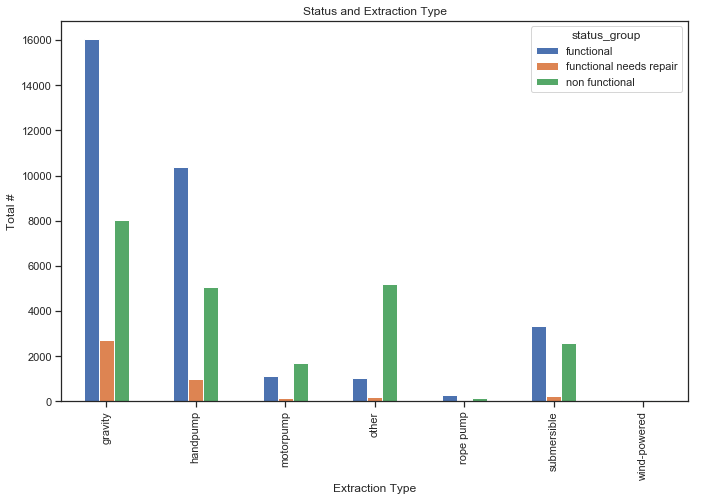

In [57]:
df_train.groupby('extraction_type_class')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(figsize=(10,7))\
    .set(ylabel='Total #', 
       xlabel='Extraction Type', 
       title='Status and Extraction Type')\

In [20]:
# predict_map = df_merge2[['id', 'status_group', 'longitude', 'latitude']]